<a href="https://colab.research.google.com/github/Sanvika25/Training-labeled-data-with-Back-propagation-vs-ML-algorithms/blob/main/ann_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#read the dataset
dataset = pd.read_csv("ChurnModelingDataset.csv")
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#separate X and target
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[6.1900000e+02 4.2000000e+01 2.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [8.1100000e+02 4.4000000e+01 3.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 7.8439730e+04]
 [5.8700000e+02 6.2000000e+01 7.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 6.7769200e+03]
 [8.1100000e+02 2.8000000e+01 4.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 9.9034200e+03]]


In [ ]:
print(y[0:5])

[1 0 1 0 0]


In [ ]:
# for our validation, convert X and y to dataframe and check the columns
df = pd.DataFrame(X)
df.head()

# observe X has 0 to 7 columns , so total of 8  columns in X

,0,1,2,3,4,5,6,7
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [ ]:
df=pd.DataFrame(y)
df.head()
# y has only target

,0
0,1
1,0
2,1
3,0
4,0


In [ ]:
# apply train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#build your keras ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Defining the ANN model
model = Sequential()
# Adding the first hidden layer, by passing X with 8 features
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 2, epochs = 10)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7997
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7997
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7997
Epoch 4/10
400/400 [==============================] - 1s 3ms/step - loss: 0.5310 - accuracy: 0.7997
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7997
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.5208 - accuracy: 0.7997
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7997
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.7997
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5153 - accuracy: 0.7997
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5180 - accuracy: 0.7997

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred[10:20])

[[0.20585498]
 [0.26671237]
 [0.24054304]
 [0.22844832]
 [0.3095492 ]
 [0.30874375]
 [0.16316944]
 [0.3104383 ]
 [0.30351844]
 [0.28038263]]


In [ ]:
print(y_test[10:20])

[0 0 0 0 0 0 1 0 0 0]


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

25/25 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7997
Train Loss: 0.5112572908401489
Train Accuracy: 0.7997496724128723


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.round(y_pred))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[156   0]
 [ 44   0]]


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7800
Test Loss: 0.5437124371528625
Test Accuracy: 0.7799999713897705


In [ ]:
#ML techniques: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_train_pred = clf.predict(X_train)
trainaccuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", trainaccuracy)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.7909887359198998
Test Accuracy: 0.765


In [ ]:
# ANN model to Logistic Regression
model = Sequential()
# Adding the first hidden layer, by passing X with 8 features
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 8))



# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 10)
y_pred = model.predict(X_test)
model.summary()
# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 782.5998 - accuracy: 0.7997
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 197.7548 - accuracy: 0.6859
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 45.6443 - accuracy: 0.6834
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 16.4410 - accuracy: 0.6821
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 7.2510 - accuracy: 0.6733
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 6.4472 - accuracy: 0.6934
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 6.3609 - accuracy: 0.6696
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 6.8513 - accuracy: 0.6796
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 4.7621 - accuracy: 0.6783
Epoch 10/10
7/7 [==============================] - 0s 3ms/step
Model: "sequential_1"
___________________________

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 28430316.0000
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6712
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6501
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6319
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6175
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6051
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5940
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5842
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5755
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5678


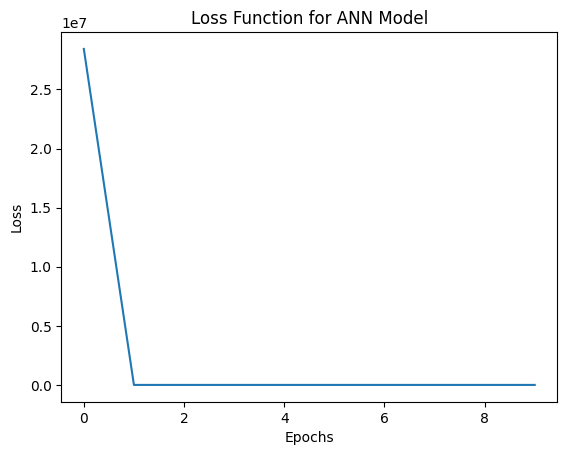

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load and preprocess Churn Modeling dataset
# Assuming you have 'X_train', 'X_test', 'y_train', 'y_test' loaded and preprocessed

# Define a function to create and train an ANN model
def create_ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define training parameters
learning_rate = 0.01
epochs = 10
loss_function = 'binary_crossentropy'
optimizer = SGD(learning_rate)

# Train the Neural Network using TensorFlow
input_dim = X_train.shape[1]
ann_model = create_ann_model(input_dim)
ann_model.compile(loss=loss_function, optimizer=optimizer)
history = ann_model.fit(X_train, y_train, epochs=epochs, verbose=1)

# Plot loss function graph for each epoch
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function for ANN Model')
plt.show()